# Computational strain design: Growth-coupled production (GCP)

A main principle for the design of bioproduction hosts is the coupling of product synthesis to microbial growth, such that the product of interest becomes a byproduct of growth. Different notions of growth-coupling principle prevail in literature. With gradually increasing coupling strength, we can distinguish four different classes:
- potentially growth-coupled production (pGCP):
  <br> product synthesis is possible at maximum growth
  <br> *(e.g., minimum demand in OptKnock computations)*
- weakly growth-coupled production (wGCP):
  <br> product synthesis is enforced at maximum growth
  <br> *(e.g., demanded by RobustKnock or OptCouple)*
- directionally growth-coupled production (dGCP):
  <br> product synthesis is enforced at all growth rates greater than zero
  <br> *(e.g., often demanded by MCS, often generated by OptCouple)*
- substrate-uptake-coupled production (SUCP):
  <br> product is synthesized whenever substrate is taken up, i.e., a minimum product yield is guaranteed
  <br> *(e.g., often demanded by MCS)*

Before moving on the computation of strain designs, we will provide strain design examples for the differnt coupling types and show their main property. To keep it as simple as possible, we will use ethanol as the desired product, use the small "textbook model" e_coli_core, and introduce only reaction knockouts.

In [1]:
import cobra
import straindesign as sd
model = cobra.io.load_model('e_coli_core')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-13


## pGCP: potentially growth-coupled production

When we knock out the reactions **PPS**, **THD2**, **TKT2** and **MDH** in e_coli_core, we obtain a potentially coupled strain design. <br> <img style="float:left; width:45%" src="../img/e_coli_core_pGCP.svg" /> <br> Below, we plot the flux space of the wild type model (blue/background) on the dimensions of growth rate and the ethanol yield and compare it to the pGCP strain design (orange/foreground). In the wild type model, growth and ethanol production compete, whereas, in the strain designed for pGCP, product synthesis is also possible (yet *not required*) at growth-maximal flux states.

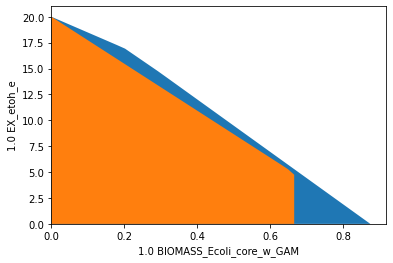

In [2]:
import matplotlib.pyplot as plt
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               show=False);
# pGCP design plot
constraints = ['PPS=0', 'THD2=0', 'TKT2=0', 'MDH=0']
_,          _,      plot2 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               constraints=constraints,
                                               show=False);
# adjust axes limits and show plot
plot2.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot2.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

## wGCP: weakly growth-coupled production

A weakly growth-coupled production strain design can be generated by knocking out the reactions **ACALDt**, **PTAr**, **PPS**, **PYRt2** and **MDH** in e_coli_core. <br> <img style="float:left; width:45%" src="../img/e_coli_core_wGCP.svg" /> <br> Below, we plot the flux space of the wild type model (blue/background) on the dimensions of growth rate and the ethanol yield and compare it to the wGCP strain design (orange/foreground). In the wild type model, growth and ethanol production compete, whereas, in the strain designed for wGCP, growth-maximal flux states can only be reached by simultanously producing ethanol.

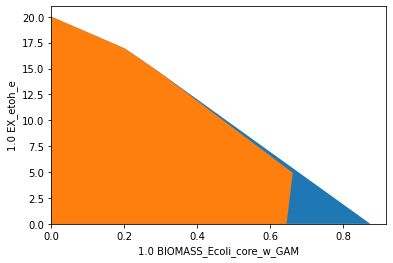

In [3]:
import matplotlib.pyplot as plt
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               show=False);
# pGCP design plot
constraints = ['ACALDt=0', 'PTAr=0', 'PPS=0', 'PYRt2=0', 'MDH=0']
_,          _,      plot2 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               constraints=constraints,
                                               show=False);
# adjust axes limits and show plot
plot2.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot2.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

## dGCP: directionally growth-coupled production

By knocking out the reactions **PGL**, **ATPS4r** and **NADH16** in e_coli_core, we obtain a directionally coupled strain design. <br> <img style="float:left; width:45%" src="../img/e_coli_core_dGCP.svg" /> <br> Below, we plot the flux space of the the dGCP strain design (orange/foreground) on the dimensions of growth rate and the ethanol production. In the strain designed for dGCP, product synthesis is occurs at all growth-associated flux states. In this example significantly higher specific production rates are reached than in the pGCP and wGCP scenario, however at the detriment of high growth rates.

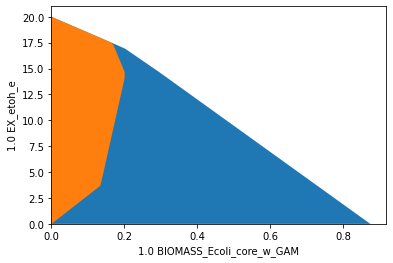

In [4]:
import matplotlib.pyplot as plt
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               show=False);
# pGCP design plot
constraints = ['PGL=0', 'ATPS4r=0', 'NADH16=0']
_,          _,      plot2 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                                               constraints=constraints,
                                               show=False);
# adjust axes limits and show plot
plot2.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot2.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

## SUCP: substrate-uptake-coupled production

In strain designs with substrate-uptake-coupled production, all feasible flux states of substrate uptake also entail production. To obtain a such a strain design for the production of ethanol, the reactions knockouts **LDH_D**, **ATPS4r** and **NADH16** can be introduced to e_coli_core. <br> <img style="float:left; width:45%" src="../img/e_coli_core_SUCP.svg" /> <br> Other than in the previous examples, we here plot the flux space of the SUCP strain design (orange/foreground) on the dimensions of growth rate and ethanol *yield*. In the SUCP strain design, a minimum product yield is ensured in all remaining feasible flux states. Again, the improved production capacities often come at the expense of viability.

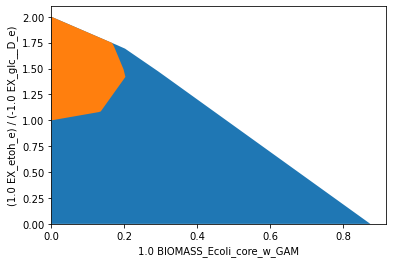

In [5]:
import matplotlib.pyplot as plt
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                                               show=False);
# pGCP design plot
constraints = ['LDH_D=0', 'ATPS4r=0', 'NADH16=0']
_,          _,      plot2 = sd.plot_flux_space(model,
                                               ('BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                                               constraints=constraints,
                                               show=False);
# adjust axes limits and show plot
plot2.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot2.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

In the following chapter, we discuss how different algorithms can be used to generate growth-coupled strain designs.